In [242]:
# Importing libraries for data cleaning and data analysis

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [243]:
squirrels = pd.read_csv("2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20240320.csv")

squirrels.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [244]:
squirrels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

In [245]:

squirrels.shape

(3023, 31)

In [246]:
squirrels.columns

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Color notes', 'Location', 'Above Ground Sighter Measurement',
       'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Lat/Long'],
      dtype='object')

In [247]:
squirrels.isnull().sum()

X                                                0
Y                                                0
Unique Squirrel ID                               0
Hectare                                          0
Shift                                            0
Date                                             0
Hectare Squirrel Number                          0
Age                                            121
Primary Fur Color                               55
Highlight Fur Color                           1086
Combination of Primary and Highlight Color       0
Color notes                                   2841
Location                                        64
Above Ground Sighter Measurement               114
Specific Location                             2547
Running                                          0
Chasing                                          0
Climbing                                         0
Eating                                           0
Foraging                       

In [248]:

# Drop columns we are not using for data analysis
squirrels = squirrels.drop(columns=['Hectare', 'Hectare Squirrel Number', 'Color notes', 'Specific Location', 'Other Activities', 'Other Interactions'])

In [249]:
squirrels.columns

Index(['X', 'Y', 'Unique Squirrel ID', 'Shift', 'Date', 'Age',
       'Primary Fur Color', 'Highlight Fur Color',
       'Combination of Primary and Highlight Color', 'Location',
       'Above Ground Sighter Measurement', 'Running', 'Chasing', 'Climbing',
       'Eating', 'Foraging', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from', 'Lat/Long'],
      dtype='object')

In [250]:
squirrels.isnull().sum()

X                                                0
Y                                                0
Unique Squirrel ID                               0
Shift                                            0
Date                                             0
Age                                            121
Primary Fur Color                               55
Highlight Fur Color                           1086
Combination of Primary and Highlight Color       0
Location                                        64
Above Ground Sighter Measurement               114
Running                                          0
Chasing                                          0
Climbing                                         0
Eating                                           0
Foraging                                         0
Kuks                                             0
Quaas                                            0
Moans                                            0
Tail flags                     

In [251]:
squirrels = squirrels.dropna(subset=['Age', 'Primary Fur Color', 'Location', 'Above Ground Sighter Measurement'])

In [252]:
squirrels.isnull().sum()

X                                               0
Y                                               0
Unique Squirrel ID                              0
Shift                                           0
Date                                            0
Age                                             0
Primary Fur Color                               0
Highlight Fur Color                           962
Combination of Primary and Highlight Color      0
Location                                        0
Above Ground Sighter Measurement                0
Running                                         0
Chasing                                         0
Climbing                                        0
Eating                                          0
Foraging                                        0
Kuks                                            0
Quaas                                           0
Moans                                           0
Tail flags                                      0


In [253]:
# Rename columns for easy data manipulation

new_cols_dict = {
  'X' : 'longitude',
  'Y' : 'latitude',
  'Shift' : 'shift',
  'Date' : 'date',
  'Unique Squirrel ID' : 'squirrel_id',
  'Age' : 'age',
  'Primary Fur Color' : 'fur_color',
  'Highlight Fur Color' : 'highlight_fur_color',
  'Combination of Primary and Highlight Color' : 'combination_of_fur_color',
  'Location' : 'location',
  'Above Ground Sighter Measurement' : 'above_ground',
  'Running' : 'running',
  'Chasing' : 'chasing',
  'Climbing' : 'climbing',
  'Eating' : 'eating',
  'Foraging' : 'foraging',
  'Kuks' : 'kuks',
  'Quaas' : 'quaas',
  'Moans' : 'moans',
  'Tail flags' : 'tail_flags',
  'Tail twitches' : 'tail_twitches',
  'Approaches' : 'approaches_humans',
  'Indifferent' : 'indifferent_humans',
  'Runs from' : 'runs_from_humans',
  'Lat/Long' : 'lat_long'
}

squirrels.rename(new_cols_dict, axis=1, inplace=True)

In [254]:
squirrels.columns

Index(['longitude', 'latitude', 'squirrel_id', 'shift', 'date', 'age',
       'fur_color', 'highlight_fur_color', 'combination_of_fur_color',
       'location', 'above_ground', 'running', 'chasing', 'climbing', 'eating',
       'foraging', 'kuks', 'quaas', 'moans', 'tail_flags', 'tail_twitches',
       'approaches_humans', 'indifferent_humans', 'runs_from_humans',
       'lat_long'],
      dtype='object')

In [255]:
# Convert date integer type to datetime

# Inspecting date column
squirrels['date']

# Changing date column into string for readability

squirrels['date'] = pd.to_datetime(squirrels['date'].astype(str), format='%m%d%Y')

In [256]:
squirrels['date']

6      2018-10-10
7      2018-10-08
8      2018-10-06
9      2018-10-10
10     2018-10-13
          ...    
3017   2018-10-18
3018   2018-10-07
3019   2018-10-13
3020   2018-10-12
3022   2018-10-12
Name: date, Length: 2784, dtype: datetime64[ns]

What was the date for the highest number of sightings?

In [265]:
sightings = squirrels.groupby('date').size()

sightings_sorted = sightings.sort_values(ascending=False)

sightings_sorted.head(1)

date
2018-10-13    386
dtype: int64

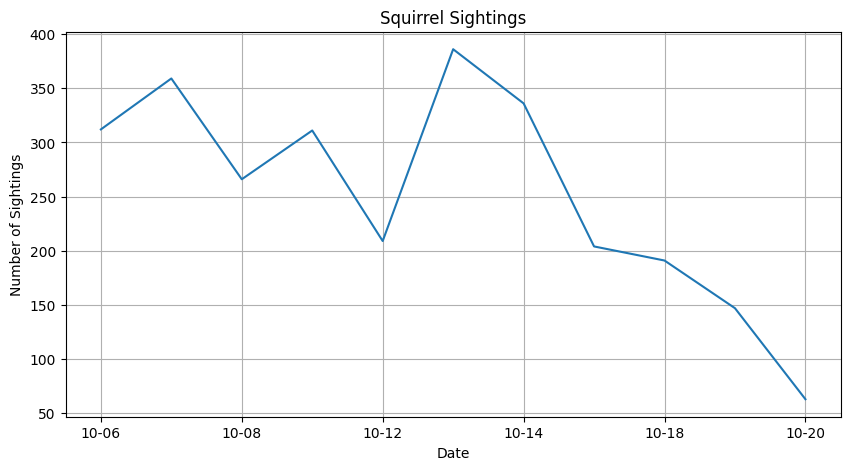

In [273]:
# Excluding the year and only grabbing the month and day
squirrels['month_day'] = squirrels['date'].dt.strftime('%m-%d')

# Grabbing the total sightings each day 
sightings = squirrels.groupby('month_day').size()

# Plotting the number of sightings over time
plt.figure(figsize=(10,5))
sightings.plot()
plt.title("Squirrel Sightings")
plt.xlabel("Date")
plt.ylabel("Number of Sightings")
plt.grid(True)
plt.show()

Who runs more, adults or juveniles?

In [337]:
adults_running = squirrels[(squirrels['age'] == 'Adult') & (squirrels['running'] == True)].shape[0]

print("Adults Running: ", adults_running)

juveniles_running = squirrels[(squirrels['age'] == 'Juvenile') & (squirrels['running'] == True)].shape[0]

print("Juveniles Running: ", juveniles_running)

Adults Running:  612
Juveniles Running:  77


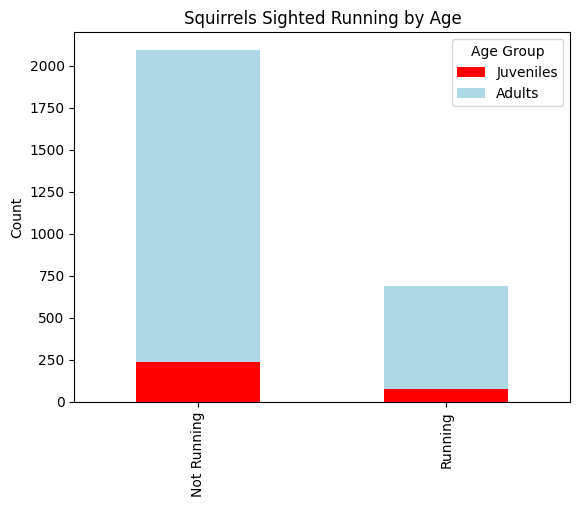

In [323]:

# Size of the grouped running and ages columns
running_count = squirrels.groupby(['running', 'age']).size()

# Separates columns into adults and juveniles
running_count = running_count.unstack()

# Makes the Juvenile squirrels bar go on the bottom of the chart 
running_count = running_count.loc[:,::-1]

# Plotting bar plot
running_count.plot(kind='bar', stacked=True, title='Squirrels Sighted Running by Age', 
                   xlabel ='', ylabel ='Count', color=['red','lightblue'])
plt.xticks([0, 1], ['Not Running', 'Running'])
plt.legend(title='Age Group', labels=['Juveniles','Adults'])